## Introduction to Linear Regression


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

: 

In [2]:
x = np.array([10, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([10, 20, 14, 32, 37, 50])

In [3]:
x

array([[10],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
y

array([10, 20, 14, 32, 37, 50])

In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model = LinearRegression().fit(x, y)

In [8]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8980798316435407


In [9]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.6383561643835627
slope: [0.82794521]


In [10]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 9.91780822 14.05753425 22.3369863  30.61643836 38.89589041 47.17534247]


In [11]:
y

array([10, 20, 14, 32, 37, 50])

### Simple Linear Regression

In [12]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [13]:
dataset = pd.read_csv('Weather.csv')

In [14]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataset.tail()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
23713,11606,1944-11-22,4.826,NaN,28.888889,24.444444,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,11606,1944-11-23,10.414,NaN,27.222222,23.333333,25.555556,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,11606,1944-11-24,4.572,NaN,29.444444,24.444444,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,11606,1944-11-25,0,NaN,30.000000,26.666667,28.333333,0.0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23717,11606,1944-11-26,1.016,NaN,30.000000,23.888889,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataset.shape

(23718, 31)

In [17]:
dataset.isnull().sum()

STA                0
Date               0
Precip             0
WindGustSpd    23718
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           4
PoorWeather    14133
YR                 0
MO                 0
DA                 0
PRCP             320
DR             23718
SPD            23718
MAX              233
MIN              237
MEA              237
SNF                5
SND            22507
FT             23718
FB             23718
FTI            23718
ITH            23718
PGT            23718
TSHDSBRSGF     14134
SD3            23718
RHX            23718
RHN            23718
RVG            23718
WTE            23718
dtype: int64

In [18]:
dataset.iloc[:,-12:]

,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23713,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dataset.drop(labels=dataset.iloc[:,-12:].columns,inplace=True,axis=1)

In [20]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SNF
count,23718.000000,0.0,23718.000000,23718.000000,23718.000000,23714.0,23718.000000,23718.000000,23718.000000,0.0,0.0,23485.000000,23481.000000,23481.000000,23713.0
mean,10790.522852,NaN,29.716320,22.154739,25.935155,0.0,43.598912,6.789864,15.799604,NaN,NaN,86.337535,72.600826,79.474043,0.0
std,484.715692,NaN,5.273870,4.544255,4.755754,0.0,1.222056,3.457112,8.795097,NaN,NaN,4.216562,3.889824,3.341701,0.0
min,10001.000000,NaN,-17.777778,-17.777778,-17.777778,0.0,40.000000,1.000000,1.000000,NaN,NaN,63.000000,51.000000,60.000000,0.0
25%,10505.000000,NaN,28.888889,21.666667,25.555556,0.0,43.000000,4.000000,8.000000,NaN,NaN,84.000000,71.000000,78.000000,0.0
50%,10718.000000,NaN,30.555556,22.777778,26.666667,0.0,44.000000,7.000000,16.000000,NaN,NaN,87.000000,73.000000,80.000000,0.0
75%,10807.000000,NaN,31.666667,23.888889,27.777778,0.0,45.000000,10.000000,23.000000,NaN,NaN,89.000000,75.000000,82.000000,0.0
max,11606.000000,NaN,38.888889,28.888889,31.666667,0.0,45.000000,12.000000,31.000000,NaN,NaN,102.000000,84.000000,89.000000,0.0


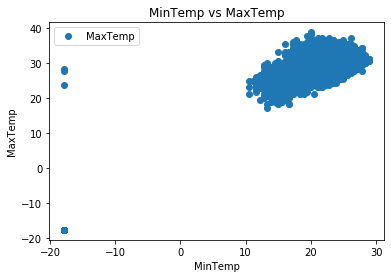

In [21]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

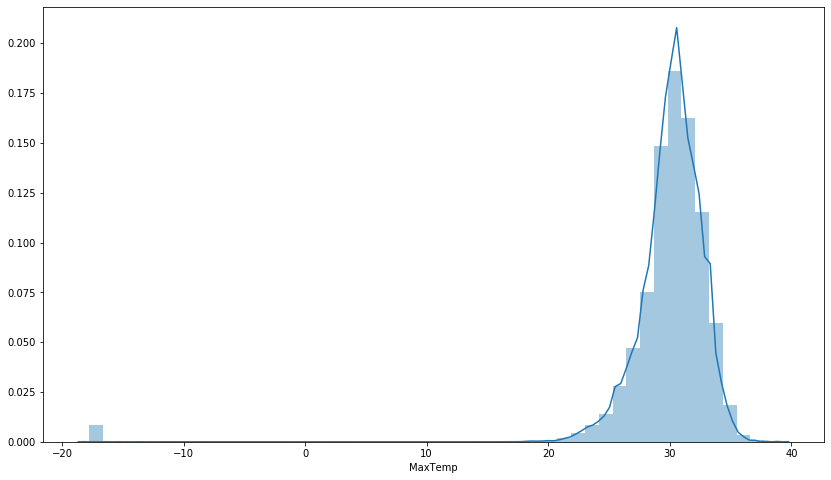

In [22]:
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [23]:
dataset['MinTemp'].values.mean

<function ndarray.mean>

In [24]:
dataset['MinTemp'].values.reshape(-1,1)

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [24.44444444],
       [26.66666667],
       [23.88888889]])

### Train and Test Splitting
#### The test_size variable is where we actually specify the proportion of the test set.


In [25]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting
#### Time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.



In [27]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Intercept and Coefficient
#### Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. 

#### To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code:


In [28]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[7.60815636]
[[0.99768578]]


### Prediction
#### This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

In [29]:
y_pred = regressor.predict(X_test)

### Evaluation of Model
#### This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, these evaluation metrics are commonly used

In [30]:
R2 = metrics.r2_score(y_test, y_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Adjusted R^2 :'  , 1 - metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2: 0.7240695682680656
Adjusted R^2 : 0.27593043173193443
Mean Absolute Error: 2.1601707651832007
Mean Squared Error: 7.458655087846455
Root Mean Squared Error: 2.731053841989655


In [31]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,31.666667,34.213110
1,29.444444,30.333221
2,31.666667,28.670412
3,28.888889,29.224682
4,28.888889,30.333221
...,...,...
4739,31.111111,30.887491
4740,33.333333,30.333221
4741,28.888889,31.441761
4742,31.111111,28.670412


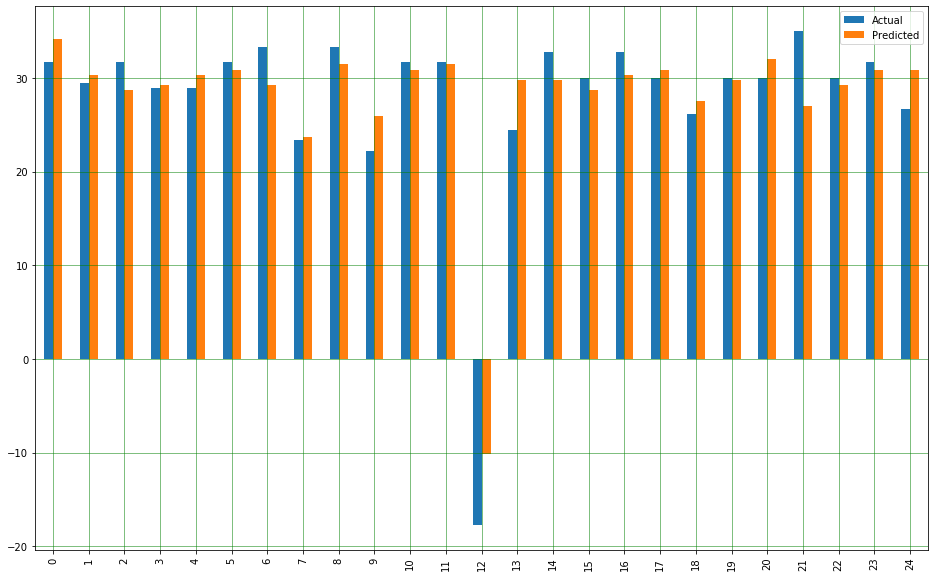

In [32]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

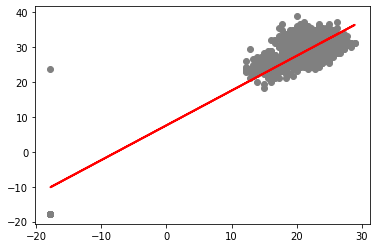

In [33]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [34]:
dataset = pd.read_csv('winequality.csv')

In [35]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [37]:
X = dataset[['fixed acidity', 
             'volatile acidity', 
             'citric acid', 
             'residual sugar', 
             'chlorides', 
             'free sulfur dioxide', 
             'total sulfur dioxide', 
             'density', 
             'pH', 
             'sulphates',
             'alcohol']]
y = dataset['quality']

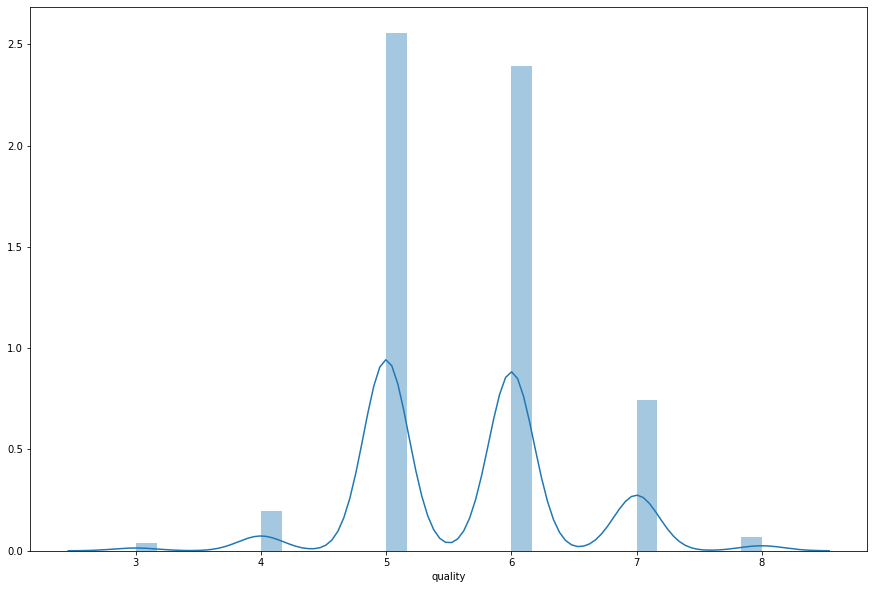

In [38]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [42]:
y_pred = regressor.predict(X_test)

In [43]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [44]:
df1

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
1054,6,5.007207
542,5,5.396162
853,6,6.052112
1189,4,4.867603
412,5,4.950676


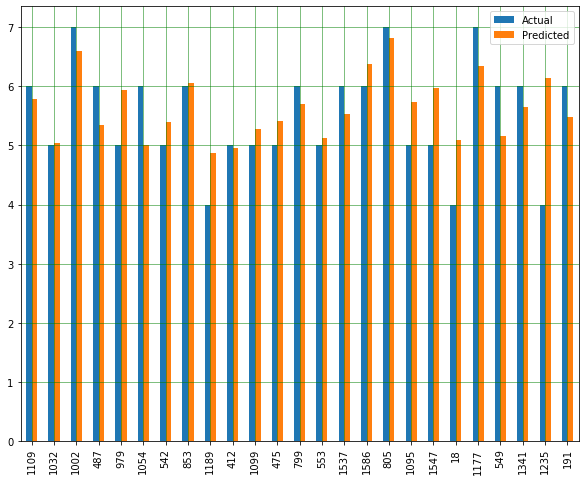

In [45]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611327
Mean Squared Error: 0.3844711978201266
Root Mean Squared Error: 0.6200574149384286


In [47]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test.to_numpy().reshape(-1,1), y_pred.reshape(-1,1)))

r2_score 0.3283887639580184


## Multiple Linear Regression



In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

print ('Predicted Stock Index Price: \n', regr.predict(X_test))


Intercept: 
 1431.7903008531664
Coefficients: 
 [ 370.54204888 -194.83930977]
Predicted Stock Index Price: 
 [1023.32247097 1062.29033293  872.23516582  950.17088973  930.68695875]
